# **Importing all the necessary libraries**

In [29]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import gridspec 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# **Loading the data**

In [57]:

data = pd.read_csv('./creditcard.csv', sep=',')

# **Exploring Data**

In [58]:
data.head(10) 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

*From the above results we can observe that there are total 284807 rows/records and 31 columns*

In [60]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## **Data Cleaning**

In [79]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

*No Null records*

# **Plotting histogram of each feature**


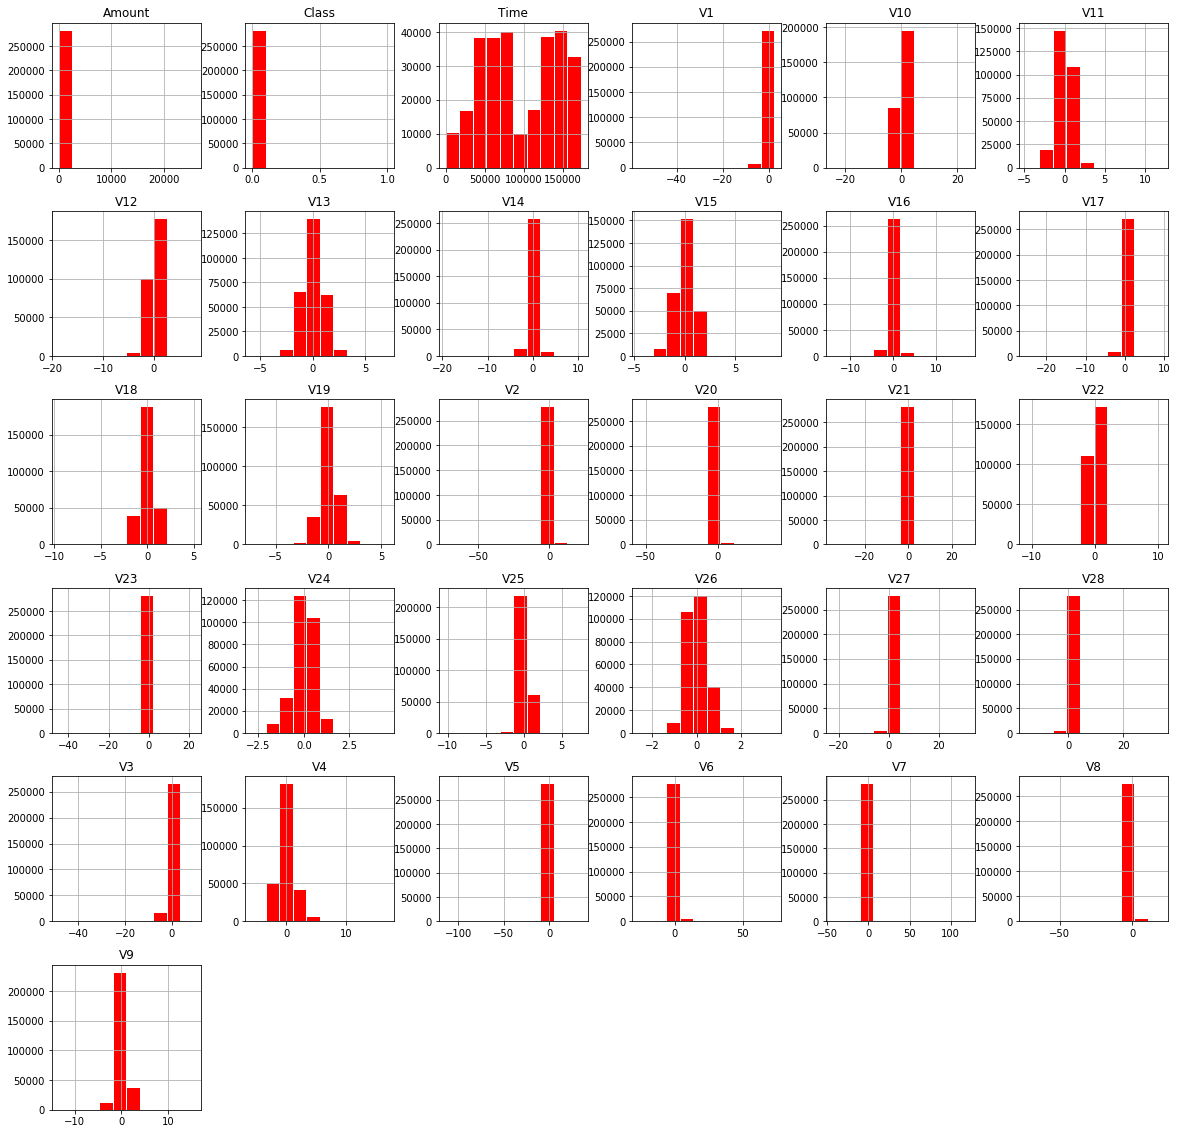

In [80]:
data.hist(figsize = (20, 20),color = 'red' , edgecolor = 'white' )
plt.show()

*We can see most of the feature V's are clustered around 0 with some or no outliers.*

# **Indentifying number of fraud and valid cases transactions**

In [81]:
fraud_cases = data[data['Class'] == 1] 
valid_cases = data[data['Class'] == 0] 
print('Fraudulent Transactions: {}'.format(len(fraud_cases))) 
print('Valid Transactions: {}'.format(len(valid_cases))) 
print('Percentage of Fraudulent Transactions: {:.2%}'.format((fraud_cases.shape[0] / data.shape[0])))

Fraudulent Transactions: 492
Valid Transactions: 284315
Percentage of Fraudulent Transactions: 0.17%


# **Inspecting more on Fraudulent Transactions and Valid Transactions**

**Amount Details of the Fraudulent Transaction**

In [82]:
fraud_cases.Amount.describe() 

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

**Amount Details of the Valid Transaction**

In [83]:
valid_cases.Amount.describe() 

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [84]:
fraud_cases.Amount.tail(25)

254395      7.59
255403      4.97
255556      0.77
258403    296.00
261056     45.51
261473      4.90
261925    156.00
262560      4.69
262826      0.77
263080      1.00
263274      0.77
263324    127.14
263877      0.38
268375     39.98
272521     12.31
274382      0.00
274475     39.90
275992    634.30
276071     19.95
276864    349.08
279863    390.00
280143      0.76
280149     77.89
281144    245.00
281674     42.53
Name: Amount, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


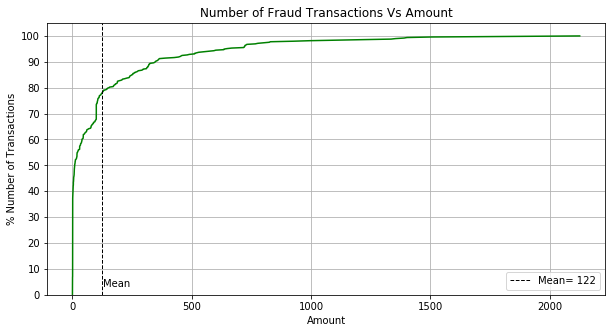

In [85]:
fraud_cases.sort_values("Amount", axis = 0, ascending = True, inplace = True, na_position ='last') 
percentage = [(x/491)*100  for x in range(492)]
fraud_amount = fraud_cases.Amount
plt.figure(figsize=(10,5))

plt.plot(fraud_amount, percentage,color='green')
plt.axvline(122, color='black',linestyle='--',linewidth=1,label='Mean= 122')
plt.legend()
plt.text(130,3,'Mean')
plt.title('Number of Fraud Transactions Vs Amount')
plt.xlabel('Amount')
plt.ylabel('% Number of Transactions')
plt.grid()
plt.yticks(np.arange(0,110,10))
plt.ylim(0,105)
plt.show()

# **Plotting the Correlation Matrix**

The correlation matrix graphically gives us an idea of how features correlate with each other and can help us predict what are the features that are most relevant for the prediction.

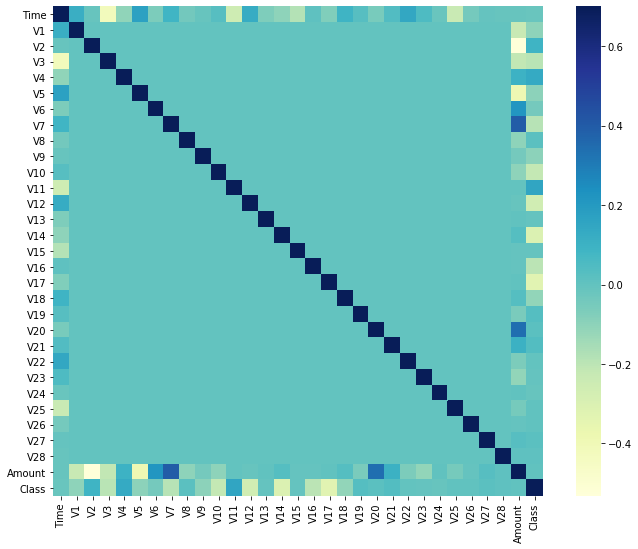

In [86]:
correlation_matrix = data.corr() 
fig = plt.figure(figsize = (12, 9)) 
sns.heatmap(correlation_matrix, vmax = .7, square = True, cmap="YlGnBu") 
plt.show() 

*From the HeatMap, we can clearly see that there are no strongly correlated features in the dataset. There are some features that either has a positive or a negative correlation with each other. Other than that, all the correlation values lie somewhere in the neutral or zero-range.*

# **Applying Machine Learning Methods**

**Bifurcation of Training and Testing Data**

We will be dividing the dataset into two main groups. One for training the model and the other for Testing our trained model’s performance.

In [87]:
X = data.drop(['Class'], axis = 1) 
Y = data["Class"] 
x_data = X.values 
y_data = Y.values
xTrain, xTest, yTrain, yTest = train_test_split(x_data, y_data, test_size = 0.2, random_state = 43) 

**Random Forest Model**

In [88]:
random_forest = RandomForestClassifier() 
random_forest.fit(xTrain, yTrain) 
y_prediction = random_forest.predict(xTest) 

**Evaluating the classifier**

In [89]:
print(classification_report(yTest, y_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56856
           1       0.93      0.75      0.83       106

    accuracy                           1.00     56962
   macro avg       0.96      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962



**Visulalizing the Confusion Matrix**

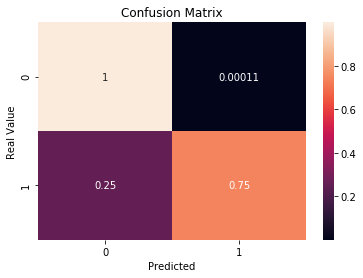

In [90]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(yTest, y_prediction, normalize='true'), annot=True, ax=ax)
ax.set_title("Confusion Matrix")
ax.set_ylabel("Real Value")
ax.set_xlabel("Predicted")

plt.show() 


**Logistic Regression**

In [91]:
regress = LogisticRegression(solver="lbfgs",max_iter=1000).fit(xTrain, yTrain)
y_prediction = regress.predict(xTest)

**Evaluating the classifier**

In [92]:
print(classification_report(yTest, y_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56856
           1       0.83      0.58      0.69       106

    accuracy                           1.00     56962
   macro avg       0.91      0.79      0.84     56962
weighted avg       1.00      1.00      1.00     56962



**Visulalizing the Confusion Matrix**

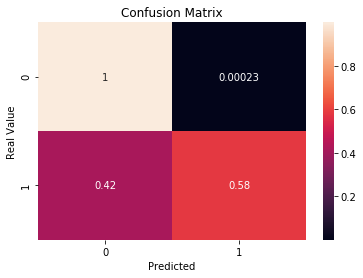

In [93]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(yTest, y_prediction, normalize='true'), annot=True, ax=ax)
ax.set_title("Confusion Matrix")
ax.set_ylabel("Real Value")
ax.set_xlabel("Predicted")

plt.show()

**Decision Tree**

In [94]:
decision_tree = DecisionTreeClassifier(max_depth=4, criterion="entropy")
decision_tree.fit(xTrain, yTrain)
y_prediction = decision_tree.predict(xTest)

**Evaluating the classifier**

In [95]:
print(classification_report(yTest, y_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56856
           1       0.87      0.73      0.79       106

    accuracy                           1.00     56962
   macro avg       0.93      0.86      0.89     56962
weighted avg       1.00      1.00      1.00     56962



**Visulalizing the Confusion Matrix**

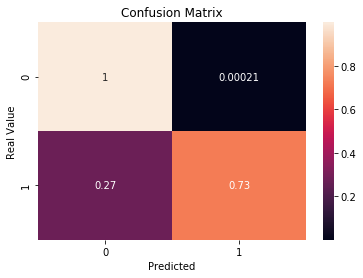

In [96]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(yTest, y_prediction, normalize='true'), annot=True, ax=ax)
ax.set_title("Confusion Matrix")
ax.set_ylabel("Real Value")
ax.set_xlabel("Predicted")

plt.show()